# 机器学习纳米学位
## 监督学习
## 项目2: 为*CharityML*寻找捐献者

欢迎来到机器学习工程师纳米学位的第二个项目！在此文件中，有些示例代码已经提供给你，但你还需要实现更多的功能让项目成功运行。除非有明确要求，你无须修改任何已给出的代码。以**'练习'**开始的标题表示接下来的代码部分中有你必须要实现的功能。每一部分都会有详细的指导，需要实现的部分也会在注释中以'TODO'标出。请仔细阅读所有的提示！

除了实现代码外，你还必须回答一些与项目和你的实现有关的问题。每一个需要你回答的问题都会以**'问题 X'**为标题。请仔细阅读每个问题，并且在问题后的**'回答'**文字框中写出完整的答案。我们将根据你对问题的回答和撰写代码所实现的功能来对你提交的项目进行评分。
>**提示：**Code 和 Markdown 区域可通过**Shift + Enter**快捷键运行。此外，Markdown可以通过双击进入编辑模式。

## 开始

在这个项目中，你将使用1994年美国人口普查收集的数据，选用几个监督学习算法以准确地建模被调查者的收入。然后，你将根据初步结果从中选择出最佳的候选算法，并进一步优化该算法以最好地建模这些数据。你的目标是建立一个能够准确地预测被调查者年收入是否超过50000美元的模型。这种类型的任务会出现在那些依赖于捐款而存在的非营利性组织。了解人群的收入情况可以帮助一个非营利性的机构更好地了解他们要多大的捐赠，或是否他们应该接触这些人。虽然我们很难直接从公开的资源中推断出一个人的一般收入阶层，但是我们可以（也正是我们将要做的）从其他的一些公开的可获得的资源中获得一些特征从而推断出该值。

这个项目的数据集来自[UCI机器学习知识库](https://archive.ics.uci.edu/ml/datasets/Census+Income)。这个数据集是由Ron Kohavi和Barry Becker在发表文章_"Scaling Up the Accuracy of Naive-Bayes Classifiers: A Decision-Tree Hybrid"_之后捐赠的，你可以在Ron Kohavi提供的[在线版本](https://www.aaai.org/Papers/KDD/1996/KDD96-033.pdf)中找到这个文章。我们在这里探索的数据集相比于原有的数据集有一些小小的改变，比如说移除了特征`'fnlwgt'` 以及一些遗失的或者是格式不正确的记录。

----
## 探索数据
运行下面的代码单元以载入需要的Python库并导入人口普查数据。注意数据集的最后一列`'income'`将是我们需要预测的列（表示被调查者的年收入会大于或者是最多50,000美元），人口普查数据中的每一列都将是关于被调查者的特征。

In [1]:
# 为这个项目导入需要的库
import numpy as np
import pandas as pd
from time import time
from IPython.display import display # 允许为DataFrame使用display()

# 导入附加的可视化代码visuals.py
import visuals as vs

# 为notebook提供更加漂亮的可视化
%matplotlib inline

# 导入人口普查数据
data = pd.read_csv("census.csv")

# 成功 - 显示第一条记录
display(data.head(n=5))

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,<=50K
2,38,Private,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K
3,53,Private,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,<=50K
4,28,Private,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,<=50K


### 练习：数据探索
首先我们对数据集进行一个粗略的探索，我们将看看每一个类别里会有多少被调查者？并且告诉我们这些里面多大比例是年收入大于50,000美元的。在下面的代码单元中，你将需要计算以下量：

- 总的记录数量，`'n_records'`
- 年收入大于50,000美元的人数，`'n_greater_50k'`.
- 年收入最多为50,000美元的人数 `'n_at_most_50k'`.
- 年收入大于50,000美元的人所占的比例， `'greater_percent'`.

**提示：** 您可能需要查看上面的生成的表，以了解`'income'`条目的格式是什么样的。 

In [2]:
# TODO：总的记录数
n_records = data.shape[0]

# TODO：被调查者的收入大于$50,000的人数
n_greater_50k = sum(data['income']==">50K")

# TODO：被调查者的收入最多为$50,000的人数
n_at_most_50k = sum(data['income']=="<=50K")

# TODO：被调查者收入大于$50,000所占的比例
greater_percent = n_greater_50k/n_records

# 打印结果
print ("Total number of records: {}".format(n_records))
print ("Individuals making more than $50,000: {}".format(n_greater_50k))
print ("Individuals making at most $50,000: {}".format(n_at_most_50k))
print ("Percentage of individuals making more than $50,000: {:.4f}%".format(greater_percent))

Total number of records: 45222
Individuals making more than $50,000: 11208
Individuals making at most $50,000: 34014
Percentage of individuals making more than $50,000: 0.2478%


总共有45222组数据，其中年收入大于50K的人群占比接近25%

#### 特征数量及类别

In [3]:
print('The number of features: {}'.format(len(data.columns)))
print('Features:\n', list(data.columns))

The number of features: 14
Features:
 ['age', 'workclass', 'education_level', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income']


#### 数值型特征

In [4]:
data.describe()

,age,education-num,capital-gain,capital-loss,hours-per-week
count,45222.000000,45222.000000,45222.000000,45222.000000,45222.000000
mean,38.547941,10.118460,1101.430344,88.595418,40.938017
std,13.217870,2.552881,7506.430084,404.956092,12.007508
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,47.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


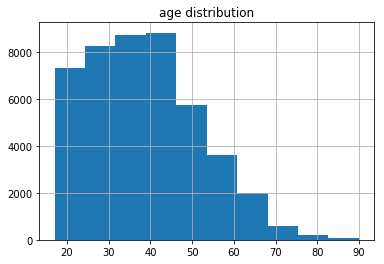

In [5]:
import matplotlib.pyplot as plt
data['age'].hist(bins=10)
plt.title('age distribution')
plt.show()

最小年龄17，最大年龄90，年龄的分别主要集中再17~60

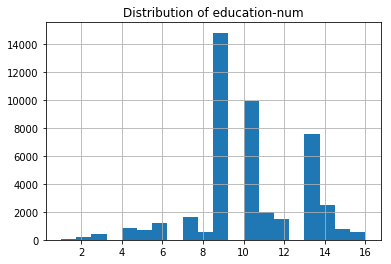

In [6]:
data['education-num'].hist(bins=20)
plt.title('Distribution of education-num')
plt.show()

受教育年限最小1年，最高16年，平均在10年左右，分布也主要集中在10年附近和14年附近。

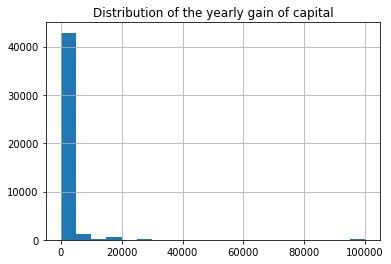

In [7]:
data['capital-gain'].hist(bins=20)
plt.title('Distribution of the yearly gain of capital')
plt.show()

大多数人的资产收益都在0附近，但是少部分人的资产收益超高，从而使资产收益的中位数为0，而平均值却高达1000，标准差达到7500左右。

可以看出大部分人的资产收益都是偏低的。

In [8]:
# 有资产收益的人所占比例
print('The percentage of capital-gain>0: {:.2f}%'.format(sum(data['capital-gain']>0)/data.shape[0]*100))

The percentage of capital-gain>0: 8.38%


In [9]:
# 分析有资产收益的人群中，资产收益的最小值、最大值、均值方差等
data[data['capital-gain']>0]['capital-gain'].describe()

count     3790.000000
mean     13142.185488
std      22676.003955
min        114.000000
25%       3464.000000
50%       7298.000000
75%      14084.000000
max      99999.000000
Name: capital-gain, dtype: float64

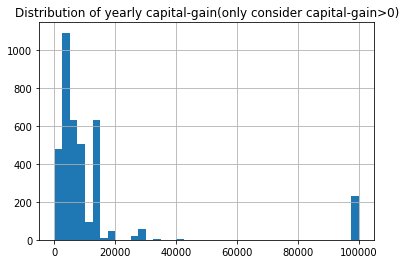

In [10]:
# 分析有资产收益的人群中，资产收益分布情况
data[data['capital-gain']>0]['capital-gain'].hist(bins=40)
plt.title('Distribution of yearly capital-gain(only consider capital-gain>0)')
plt.show()

从以上三项分析可以看出：
1. 资产投资带来收益的人占比并不高，仅为8%附近。
2. 大多数人的资产收益并不高，在15000以下。
3. 存在少部分人的资产收益超高，超高了100000。

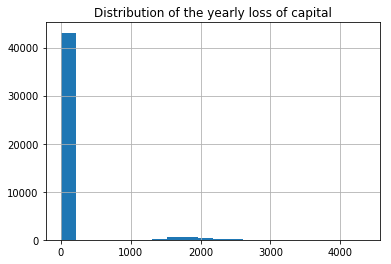

In [11]:
# 资产损失在整体数据中的分布
data['capital-loss'].hist(bins=20)
plt.title('Distribution of the yearly loss of capital')
plt.show()

In [12]:
# 有资产损失的人所占比例
print('The percentage of capital-loss>0: {:.2f}%'.format(sum(data['capital-loss']>0)/data.shape[0]*100))

The percentage of capital-loss>0: 4.73%


In [13]:
# 分析有资产损失的人群中，资产收益的最小值、最大值、均值方差等
data[data['capital-loss']>0]['capital-loss'].describe()

count    2140.000000
mean     1872.178505
std       355.224447
min       155.000000
25%      1672.000000
50%      1887.000000
75%      1977.000000
max      4356.000000
Name: capital-loss, dtype: float64

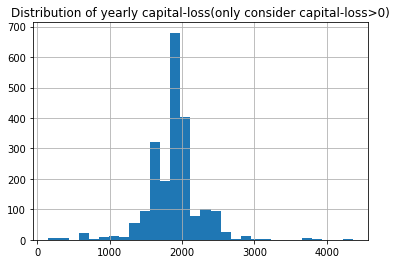

In [14]:
# 分析有资产收益的人群中，资产收益分布情况
data[data['capital-loss']>0]['capital-loss'].hist(bins=30)
plt.title('Distribution of yearly capital-loss(only consider capital-loss>0)')
plt.show()

从以上四项分析数据和图像可以看出：
1. 有资产损失的人群所占比例很低，约为5%。
2. 资产损失整体上符合正态分布的特征。
3. 资产损失主要集中在2000附近，标准差为255，分布较为集中。

**从资产收益和资产损失来看，可能大多数人都是月光族，没有资金用于资产投资，所以也就没有资产带来的损失和收益。但是从资产带来的收益数据来看，还是非常可观的，提供数据中可能有部分有钱的大佬，他们的投资收益超过了99999远高于普通人群，而普通人群的投资收益都在10000以下，投资收益的中位数在7298。而投资损失的分布类似于正态分布，损失的中位数在1887。从数据上来看，没有特别大的投资损失，但是有些投资收益特别高，所以有钱一定要多投资，哈哈哈。**

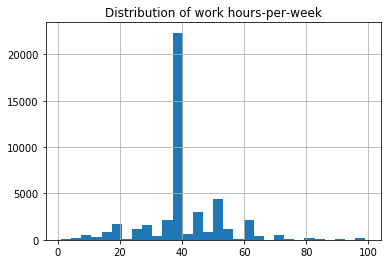

In [15]:
# 工作时间的分布情况
data['hours-per-week'].hist(bins=30)
plt.title('Distribution of work hours-per-week')
plt.show()

In [16]:
# 周工作时间的统计数据
data['hours-per-week'].describe()

count    45222.000000
mean        40.938017
std         12.007508
min          1.000000
25%         40.000000
50%         40.000000
75%         45.000000
max         99.000000
Name: hours-per-week, dtype: float64

In [17]:
# 每周工作时间
print('The percentage of hours-per-week>40: {:.2f}%'.format(sum(data['hours-per-week'] > 40)/ data.shape[0] * 100))

The percentage of hours-per-week>40: 30.47%


大多数人的周工作时间都在40小时以内，中位数和平均数都在40小时附近,同时加班的人也不少，有30%的人周工作时长大于40小时。

#### 类别型特征

In [18]:
# 工作等级的类别和计数
data.workclass.value_counts()

 Private             33307
 Self-emp-not-inc     3796
 Local-gov            3100
 State-gov            1946
 Self-emp-inc         1646
 Federal-gov          1406
 Without-pay            21
Name: workclass, dtype: int64

In [19]:
#  教育水平的类别和计数
data.education_level.value_counts()

 HS-grad         14783
 Some-college     9899
 Bachelors        7570
 Masters          2514
 Assoc-voc        1959
 11th             1619
 Assoc-acdm       1507
 10th             1223
 7th-8th           823
 Prof-school       785
 9th               676
 12th              577
 Doctorate         544
 5th-6th           449
 1st-4th           222
 Preschool          72
Name: education_level, dtype: int64

In [20]:
# 婚姻状况的类别及计数
data['marital-status'].value_counts()

 Married-civ-spouse       21055
 Never-married            14598
 Divorced                  6297
 Separated                 1411
 Widowed                   1277
 Married-spouse-absent      552
 Married-AF-spouse           32
Name: marital-status, dtype: int64

In [21]:
# 职业的类别及计数
data.occupation.value_counts()

 Craft-repair         6020
 Prof-specialty       6008
 Exec-managerial      5984
 Adm-clerical         5540
 Sales                5408
 Other-service        4808
 Machine-op-inspct    2970
 Transport-moving     2316
 Handlers-cleaners    2046
 Farming-fishing      1480
 Tech-support         1420
 Protective-serv       976
 Priv-house-serv       232
 Armed-Forces           14
Name: occupation, dtype: int64

In [22]:
# 关系的类别和计数
data['relationship'].value_counts()

 Husband           18666
 Not-in-family     11702
 Own-child          6626
 Unmarried          4788
 Wife               2091
 Other-relative     1349
Name: relationship, dtype: int64

In [23]:
# 种族的类别和计数
data['race'].value_counts()

 White                 38903
 Black                  4228
 Asian-Pac-Islander     1303
 Amer-Indian-Eskimo      435
 Other                   353
Name: race, dtype: int64

数据中白人占比较多，印度裔和亚裔占比较少。

In [24]:
# 性别的类别和计数
data['sex'].value_counts()

 Male      30527
 Female    14695
Name: sex, dtype: int64

数据中，男性大约为女性数量的两倍

In [25]:
# 本土国家的类别和计数
data['native-country'].value_counts()

 United-States                 41292
 Mexico                          903
 Philippines                     283
 Germany                         193
 Puerto-Rico                     175
 Canada                          163
 El-Salvador                     147
 India                           147
 Cuba                            133
 England                         119
 China                           113
 Jamaica                         103
 South                           101
 Italy                           100
 Dominican-Republic               97
 Japan                            89
 Guatemala                        86
 Vietnam                          83
 Columbia                         82
 Poland                           81
 Haiti                            69
 Portugal                         62
 Iran                             56
 Taiwan                           55
 Greece                           49
 Nicaragua                        48
 Peru                             45
 

----
## 准备数据
在数据能够被作为输入提供给机器学习算法之前，它经常需要被清洗，格式化，和重新组织 - 这通常被叫做**预处理**。幸运的是，对于这个数据集，没有我们必须处理的无效或丢失的条目，然而，由于某一些特征存在的特性我们必须进行一定的调整。这个预处理都可以极大地帮助我们提升几乎所有的学习算法的结果和预测能力。

### 获得特征和标签
`income` 列是我们需要的标签，记录一个人的年收入是否高于50K。 因此我们应该把他从数据中剥离出来，单独存放。

In [26]:
# 将数据切分成特征和对应的标签
income_raw = data['income']
features_raw = data.drop('income', axis = 1)

### 转换倾斜的连续特征

一个数据集有时可能包含至少一个靠近某个数字的特征，但有时也会有一些相对来说存在极大值或者极小值的不平凡分布的的特征。算法对这种分布的数据会十分敏感，并且如果这种数据没有能够很好地规一化处理会使得算法表现不佳。在人口普查数据集的两个特征符合这个描述：'`capital-gain'`和`'capital-loss'`。

运行下面的代码单元以创建一个关于这两个特征的条形图。请注意当前的值的范围和它们是如何分布的。

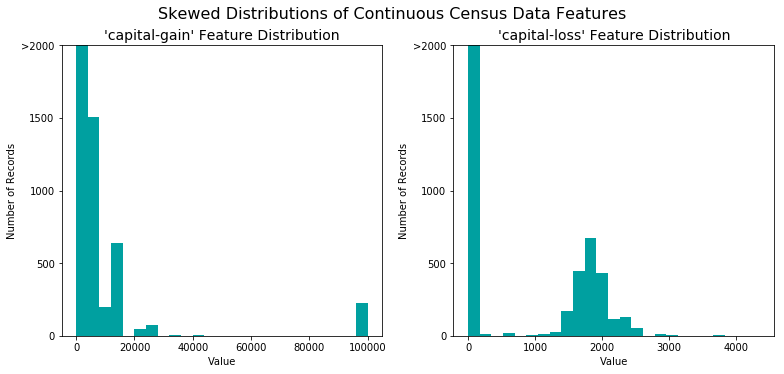

In [27]:
# 可视化 'capital-gain'和'capital-loss' 两个特征
vs.distribution(features_raw)

- 'capital-gain'特征：分布主要集中在0~20000之间，部分在靠近100000附近，没有记录分布在50000~90000之间。
- 'capital-loss'特征：分布集中在2000附近，在2000附近呈现出正态分布的特征，但是有部分数据集中在0附近。

**可以看出这两个特征的数值分布区间特别广，最小在0附近，最大接近10万，这种特征不利于机器学习的训练，需要进行缩放处理**

对于高度倾斜分布的特征如`'capital-gain'`和`'capital-loss'`，常见的做法是对数据施加一个<a href="https://en.wikipedia.org/wiki/Data_transformation_(statistics)">对数转换</a>，将数据转换成对数，这样非常大和非常小的值不会对学习算法产生负面的影响。并且使用对数变换显著降低了由于异常值所造成的数据范围异常。但是在应用这个变换时必须小心：因为0的对数是没有定义的，所以我们必须先将数据处理成一个比0稍微大一点的数以成功完成对数转换。

运行下面的代码单元来执行数据的转换和可视化结果。再次，注意值的范围和它们是如何分布的。

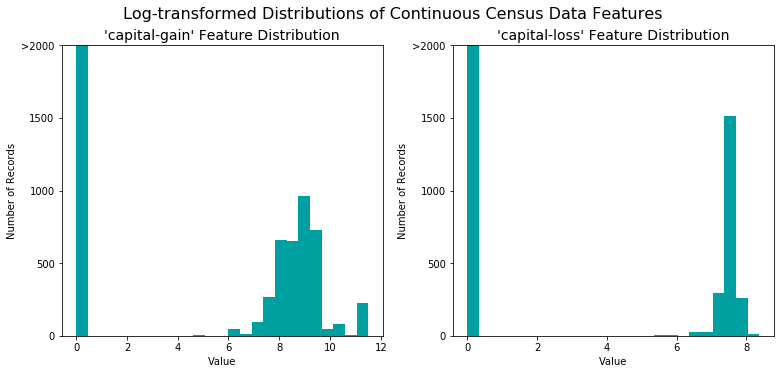

In [28]:
# 对于倾斜的数据使用Log转换
skewed = ['capital-gain', 'capital-loss']
features_raw[skewed] = data[skewed].apply(lambda x: np.log(x + 1))

# 可视化对数转换后 'capital-gain'和'capital-loss' 两个特征
vs.distribution(features_raw, transformed = True)

**缩放处理后，通过上图可以看到对数转换之后，这两个特征的值更加集中，比如'capital-gain'集中在0~12之间，而'capital-loss'在0~8之间。**

### 规一化数字特征
除了对于高度倾斜的特征施加转换，对数值特征施加一些形式的缩放通常会是一个好的习惯。在数据上面施加一个缩放并不会改变数据分布的形式（比如上面说的'capital-gain' or 'capital-loss'）；但是，规一化保证了每一个特征在使用监督学习器的时候能够被平等的对待。注意一旦使用了缩放，观察数据的原始形式不再具有它本来的意义了，就像下面的例子展示的。

运行下面的代码单元来规一化每一个数字特征。我们将使用[`sklearn.preprocessing.MinMaxScaler`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html)来完成这个任务。

In [29]:
from sklearn.preprocessing import MinMaxScaler

# 初始化一个 scaler，并将它施加到特征上
scaler = MinMaxScaler()
numerical = ['age', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']
features_raw[numerical] = scaler.fit_transform(data[numerical])

# 显示一个经过缩放的样例记录
display(features_raw.head(n = 1))

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,0.30137,State-gov,Bachelors,0.8,Never-married,Adm-clerical,Not-in-family,White,Male,0.02174,0.0,0.397959,United-States


In [30]:
# 显示归一化后数字特征的统计特征
features_raw.describe()

,age,education-num,capital-gain,capital-loss,hours-per-week
count,45222.000000,45222.000000,45222.000000,45222.000000,45222.000000
mean,0.295177,0.607897,0.011014,0.020339,0.407531
std,0.181067,0.170192,0.075065,0.092965,0.122526
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.150685,0.533333,0.000000,0.000000,0.397959
50%,0.273973,0.600000,0.000000,0.000000,0.397959
75%,0.410959,0.800000,0.000000,0.000000,0.448980
max,1.000000,1.000000,1.000000,1.000000,1.000000


**可以看到归一化后数字特征位于0~1之间**

### 练习：数据预处理

从上面的**数据探索**中的表中，我们可以看到有几个属性的每一条记录都是非数字的。通常情况下，学习算法期望输入是数字的，这要求非数字的特征（称为类别变量）被转换。转换类别变量的一种流行的方法是使用**独热编码**方案。独热编码为每一个非数字特征的每一个可能的类别创建一个_“虚拟”_变量。例如，假设`someFeature`有三个可能的取值`A`，`B`或者`C`，。我们将把这个特征编码成`someFeature_A`, `someFeature_B`和`someFeature_C`.

| 特征X |                    | 特征X_A | 特征X_B | 特征X_C |
| :-: |                            | :-: | :-: | :-: |
|  B  |  | 0 | 1 | 0 |
|  C  | ----> 独热编码 ----> | 0 | 0 | 1 |
|  A  |  | 1 | 0 | 0 |

此外，对于非数字的特征，我们需要将非数字的标签`'income'`转换成数值以保证学习算法能够正常工作。因为这个标签只有两种可能的类别（"<=50K"和">50K"），我们不必要使用独热编码，可以直接将他们编码分别成两个类`0`和`1`，在下面的代码单元中你将实现以下功能：
 - 使用[`pandas.get_dummies()`](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html?highlight=get_dummies#pandas.get_dummies)对`'features_raw'`数据来施加一个独热编码。
 - 将目标标签`'income_raw'`转换成数字项。
   - 将"<=50K"转换成`0`；将">50K"转换成`1`。

In [31]:
# TODO：使用pandas.get_dummies()对'features_raw'数据进行独热编码
features = pd.get_dummies(features_raw)

# TODO：将'income_raw'编码成数字值
income = (income_raw=='>50K').astype(int)

# 打印经过独热编码之后的特征数量
encoded = list(features.columns)
print ("{} total features after one-hot encoding.".format(len(encoded)))

# 移除下面一行的注释以观察编码的特征名字
# print(encoded)

103 total features after one-hot encoding.


### 混洗和切分数据
现在所有的 _类别变量_ 已被转换成数值特征，而且所有的数值特征已被规一化。和我们一般情况下做的一样，我们现在将数据（包括特征和它们的标签）切分成训练和测试集。其中80%的数据将用于训练和20%的数据用于测试。然后再进一步把训练数据分为训练集和验证集，用来选择和优化模型。

运行下面的代码单元来完成切分。

In [32]:
# 导入 train_test_split
from sklearn.model_selection import train_test_split

# 将'features'和'income'数据切分成训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(features, income, test_size = 0.2, random_state = 0, 
                                                    stratify = income)

# 将'X_train'和'y_train'进一步切分为训练集和验证集
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=0,
                                                    stratify = y_train)

# 显示切分的结果
print ("Training set has {} samples.".format(X_train.shape[0]))
print ("Validation set has {} samples.".format(X_val.shape[0]))
print ("Testing set has {} samples.".format(X_test.shape[0]))

Training set has 28941 samples.
Validation set has 7236 samples.
Testing set has 9045 samples.


----
## 评价模型性能
在这一部分中，我们将尝试四种不同的算法，并确定哪一个能够最好地建模数据。四种算法包含一个*天真的预测器* 和三个你选择的监督学习器。

### 评价方法和朴素的预测器
*CharityML*通过他们的研究人员知道被调查者的年收入大于\$50,000最有可能向他们捐款。因为这个原因*CharityML*对于准确预测谁能够获得\$50,000以上收入尤其有兴趣。这样看起来使用**准确率**作为评价模型的标准是合适的。另外，把*没有*收入大于\$50,000的人识别成年收入大于\$50,000对于*CharityML*来说是有害的，因为他想要找到的是有意愿捐款的用户。这样，我们期望的模型具有准确预测那些能够年收入大于\$50,000的能力比模型去**查全**这些被调查者*更重要*。我们能够使用**F-beta score**作为评价指标，这样能够同时考虑查准率和查全率：

$$ F_{\beta} = (1 + \beta^2) \cdot \frac{precision \cdot recall}{\left( \beta^2 \cdot precision \right) + recall} $$


尤其是，当 $\beta = 0.5$ 的时候更多的强调查准率，这叫做**F$_{0.5}$ score** （或者为了简单叫做F-score）。

### 问题 1 - 天真的预测器的性能

通过查看收入超过和不超过 \$50,000 的人数，我们能发现多数被调查者年收入没有超过 \$50,000。如果我们简单地预测说*“这个人的收入没有超过 \$50,000”*，我们就可以得到一个 准确率超过 50% 的预测。这样我们甚至不用看数据就能做到一个准确率超过 50%。这样一个预测被称作是天真的。通常对数据使用一个*天真的预测器*是十分重要的，这样能够帮助建立一个模型表现是否好的基准。 使用下面的代码单元计算天真的预测器的相关性能。将你的计算结果赋值给`'accuracy'`, `‘precision’`, `‘recall’` 和 `'fscore'`，这些值会在后面被使用，请注意这里不能使用scikit-learn，你需要根据公式自己实现相关计算。

*如果我们选择一个无论什么情况都预测被调查者年收入大于 \$50,000 的模型，那么这个模型在**验证集上**的准确率，查准率，查全率和 F-score是多少？*  


In [33]:
#不能使用scikit-learn，你需要根据公式自己实现相关计算。

#TODO： 计算准确率
accuracy = sum(y_val)/len(y_val)

# TODO： 计算查准率 Precision
TP = sum(y_val)
FP = len(y_val) - sum(y_val)
TN = 0
FN = 0
precision = TP / (TP + FP)

# TODO： 计算查全率 Recall
recall = TP / (TP + FN)

# TODO： 使用上面的公式，设置beta=0.5，计算F-score
fscore = (1 + 0.5**2) * precision * recall / (0.5**2 * precision + recall)

# 打印结果
print ("Naive Predictor on validation data: \n \
    Accuracy score: {:.4f} \n \
    Precision: {:.4f} \n \
    Recall: {:.4f} \n \
    F-score: {:.4f}".format(accuracy, precision, recall, fscore))

Naive Predictor on validation data: 
     Accuracy score: 0.2478 
     Precision: 0.2478 
     Recall: 1.0000 
     F-score: 0.2917


## 监督学习模型
### 问题 2 - 模型应用

你能够在 [`scikit-learn`](http://scikit-learn.org/stable/supervised_learning.html) 中选择以下监督学习模型
- 高斯朴素贝叶斯 (GaussianNB)
- 决策树 (DecisionTree)
- 集成方法 (Bagging, AdaBoost, Random Forest, Gradient Boosting)
- K近邻 (K Nearest Neighbors)
- 随机梯度下降分类器 (SGDC)
- 支撑向量机 (SVM)
- Logistic回归（LogisticRegression）

从上面的监督学习模型中选择三个适合我们这个问题的模型，并回答相应问题。

### 模型1

**模型名称**

回答：决策树


**描述一个该模型在真实世界的一个应用场景。（你需要为此做点研究，并给出你的引用出处）**

回答：参考文献[1]适用决策树算法，根据客户的个人信息（包括性别、工作、婚姻状况、年龄、联系方式、是否有贷款、年度结余等）预测客户是否会订购某一款定期存款产品。

**这个模型的优势是什么？他什么情况下表现最好？**

回答：

1. 可解释性好。生成的决策树很直观，模型做预测时的决策过程容易理解，根据决策树就能知道模型如何选择特征、如何根据特征进行划分。
2. 对于连续型数据和类别性数据均可以处理。
3. 基本不需要预处理，不需要提前归一化，处理缺失值。
4. 对于非线性的分类边界也可以拟合得较好。
5. 可以交叉验证的剪枝来选择模型，从而提高泛化能力。
6. 可以处理多维度输出的分类问题。

**这个模型的缺点是什么？什么条件下它表现很差？**

回答：

1. 决策树算法非常容易过拟合，导致泛化能力不强。但可以通过设置节点最少样本数量和限制决策树深度来改进。
2. 决策树会因为样本发生一点点的改动，就会导致树结构的剧烈改变。从而使决策树算法非常容易被攻击，因为决策树最终在底层判断是基于单个条件的，攻击者往往只需要改变很少的特征就可以导致分类错误。
3. 有些比较复杂的关系，决策树很难学习，比如异或。
4. 寻找最优的决策树是一个NP难的问题，我们一般是通过启发式方法，容易陷入局部最优。

**根据我们当前数据集的特点，为什么这个模型适合这个问题。**

回答：

该问题中，既存在连续性数据的特征，又有离散型数据的特征，并且决策树的解释性较好，对于模型给出的分类结果可以根据决策树的结果将其解释出来。即使决策树存在过拟合的问题，但我们可以通过调参节点样本点数量、决策树深度等进行改善。

- 参考文献

[1]Karim M, Rahman R M. Decision Tree and Naive Bayes Algorithm for Classification and Generation of Actionable Knowledge for Direct Marketing[J]. Journal of Software Engineering and Applications, 2013, 06(04): 196–206.

[2] 1.10. Decision Trees — scikit-learn 0.21.3 documentation[EB/OL]. [2019-12-01]. https://scikit-learn.org/stable/modules/tree.html.

[3] Kumar R. Decision Tree for the Weather Forecasting[J]. International Journal of Computer Applications, 2013, 76(2): 31–34.


### 模型2

**模型名称**

回答：AdaBoost

**描述一个该模型在真实世界的一个应用场景。（你需要为此做点研究，并给出你的引用出处）**

回答：

在参考文献[1]和[2]中，AdaBoost算法被用来对照片中的车辆类型进行分类。


**这个模型的优势是什么？他什么情况下表现最好？**

回答：

1. 不容易发生过拟合，克服了简单决策树的主要缺点。
2. 在Adaboost的框架下，可以使用各种回归分类模型来构建弱学习器，非常灵活。
3. 对于离散型数据和连续型数据都适用。

**这个模型的缺点是什么？什么条件下它表现很差？**

回答：

1. 对异常样本敏感，异常样本在迭代中可能会获得较高的权重，影响最终的强学习器的预测准确性。

**根据我们当前数据集的特点，为什么这个模型适合这个问题。**

回答：

采用决策树作为弱学习器的AdaBoost算法克服了决策树过拟合的缺点，即AdaBoost具有决策树的所有优点，同时克服了决策树的部分缺点，那么基本上决策树适用的问题，AdaBoost也能适用。

- 参考文献

[1]Wen X, Shao L, Xue Y, 等. A Rapid Learning Algorithm for Vehicle Classification[J]. Inf. Sci., 2015, 295(C): 395–406.

[2]Wen X, Yuhui Zheng. An improved algorithm based on AdaBoost for vehicle recognition[C]//The 2nd International Conference on Information Science and Engineering. 2010: 981–984.

[3]Application of AdaBoost Algorithm in Basketball Player Detection[J]. Acta Polytechnica Hungarica, 2014, 12(1).

[4]集成学习之Adaboost算法原理小结 - 刘建平Pinard - 博客园[EB/OL]. [2019-12-01]. https://www.cnblogs.com/pinard/p/6133937.html.

### 模型3

**模型名称**

回答：支持向量机


**描述一个该模型在真实世界的一个应用场景。（你需要为此做点研究，并给出你的引用出处）**

回答：

在文献[2]和文献[3]中支持向量机分别用户文本分类和图像分类的应用。

**这个模型的优势是什么？他什么情况下表现最好？**

回答：

1. 解决高维特征的分类问题和回归问题很有效,在特征维度大于样本数时依然有很好的效果。
2. 仅仅使用一部分支持向量来做超平面的决策，无需依赖全部数据。
3. 有大量的核函数可以使用，从而可以很灵活的来解决各种非线性的分类回归问题。
4. 样本量不是海量数据的时候，分类准确率高，泛化能力强。
5. 决策超平面尽量保持与样本点的距离，使其抗攻击的能力较强。

**这个模型的缺点是什么？什么条件下它表现很差？**

回答：

1. 如果特征维度远远大于样本数，则SVM表现一般。
2. SVM在样本量非常大，核函数映射维度非常高时，计算量过大，不太适合使用。
3. 非线性问题的核函数的选择没有通用标准，难以选择一个合适的核函数。
4. SVM对缺失数据敏感。

**根据我们当前数据集的特点，为什么这个模型适合这个问题。**

回答：

支持向量机属于在不知道选择何种模型时，可以拿来试一下的模型，因此这里适用SVM进行一下尝试。

- 参考文献

[1]支持向量机原理(五)线性支持回归 - 刘建平Pinard - 博客园[EB/OL]. [2019-12-01]. https://www.cnblogs.com/pinard/p/6113120.html.

[2]Tong S, Koller D. Support Vector Machine Active Learning with Applications to Text Classiﬁcation[J]. : 8.

[3]Liu P, Choo K-K R, Wang L, 等. SVM or deep learning? A comparative study on remote sensing image classification[J]. Soft Computing, 2017, 21(23): 7053–7065.

[4]Mantovani R G, Rossi A L D, Vanschoren J, 等. To tune or not to tune: Recommending when to adjust SVM hyper-parameters via meta-learning[C]//2015 International Joint Conference on Neural Networks (IJCNN). Killarney, Ireland: IEEE, 2015: 1–8.


### 练习 - 创建一个训练和预测的流水线
为了正确评估你选择的每一个模型的性能，创建一个能够帮助你快速有效地使用不同大小的训练集并在验证集上做预测的训练和验证的流水线是十分重要的。
你在这里实现的功能将会在接下来的部分中被用到。在下面的代码单元中，你将实现以下功能：

 - 从[`sklearn.metrics`](http://scikit-learn.org/stable/modules/classes.html#sklearn-metrics-metrics)中导入`fbeta_score`和`accuracy_score`。
 - 用训练集拟合学习器，并记录训练时间。
 - 对训练集的前300个数据点和验证集进行预测并记录预测时间。
 - 计算预测训练集的前300个数据点的准确率和F-score。
 - 计算预测验证集的准确率和F-score。

In [34]:
# TODO：从sklearn中导入两个评价指标 - fbeta_score和accuracy_score
from sklearn.metrics import fbeta_score, accuracy_score

def train_predict(learner, sample_size, X_train, y_train, X_val, y_val):
    '''
    inputs:
       - learner: the learning algorithm to be trained and predicted on
       - sample_size: the size of samples (number) to be drawn from training set
       - X_train: features training set
       - y_train: income training set
       - X_val: features validation set
       - y_val: income validation set
    '''
    
    results = {}
    
    learner_name = learner.__class__.__name__
    # TODO：使用sample_size大小的训练数据来拟合学习器
    # TODO: Fit the learner to the training data using slicing with 'sample_size'
    start = time() # 获得程序开始时间
    learner.fit(X_train[:sample_size], y_train[:sample_size])
    end = time() # 获得程序结束时间
    
    # TODO：计算训练时间
    results['train_time'] = end - start
    
    # TODO: 得到在验证集上的预测值
    #       然后得到对前300个训练数据的预测结果
    start = time() # 获得程序开始时间
    predictions_val = learner.predict(X_val)
    predictions_train = learner.predict(X_train)
    end = time() # 获得程序结束时间
    
#     print(set(y_val)- set(predictions_val))         # 调试是否存在简单预测的情况
#     print(set(y_train) - set(predictions_train))
    # TODO：计算预测用时
    results['pred_time'] = end - start
            
    # TODO：计算在最前面的300个训练数据的准确率
    results['acc_train'] = accuracy_score(y_train, predictions_train)
        
    # TODO：计算在验证上的准确率
    results['acc_val'] = accuracy_score(y_val, predictions_val)
    
    # TODO：计算在最前面300个训练数据上的F-score
    results['f_train'] = fbeta_score(y_train, predictions_train, beta=0.5)
        
    # TODO：计算验证集上的F-score
    results['f_val'] = fbeta_score(y_val, predictions_val, beta=0.5)
       
    # 成功
    print ("{} trained on {} samples.".format(learner_name, sample_size))
        
    # 返回结果
    return results

### 练习：初始模型的评估
在下面的代码单元中，您将需要实现以下功能：             
- 导入你在前面讨论的三个监督学习模型。             
- 初始化三个模型并存储在`'clf_A'`，`'clf_B'`和`'clf_C'`中。
  - 使用模型的默认参数值，在接下来的部分中你将需要对某一个模型的参数进行调整。             
  - 设置`random_state`  (如果有这个参数)。       
- 计算1%， 10%， 100%的训练数据分别对应多少个数据点，并将这些值存储在`'samples_1'`, `'samples_10'`, `'samples_100'`中

**注意：**取决于你选择的算法，下面实现的代码可能需要一些时间来运行！

DecisionTreeClassifier trained on 289 samples.
DecisionTreeClassifier trained on 2894 samples.
DecisionTreeClassifier trained on 28941 samples.
AdaBoostClassifier trained on 289 samples.
AdaBoostClassifier trained on 2894 samples.
AdaBoostClassifier trained on 28941 samples.
SVC trained on 289 samples.
SVC trained on 2894 samples.
SVC trained on 28941 samples.


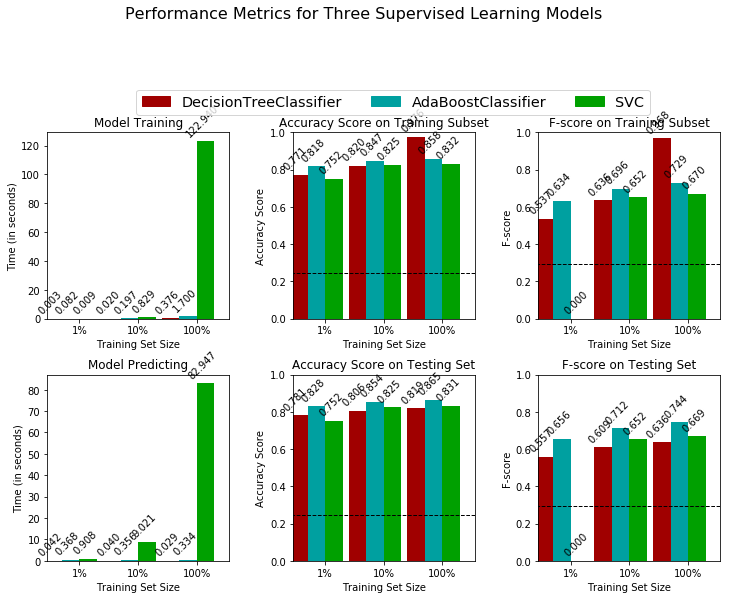

In [35]:
# TODO：从sklearn中导入三个监督学习模型
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
# SVC模型在1%的训练数据时，计算fscore会报warning，去除warning
# warning原因分析：SVC模型会在1%数据时，将prediction完全预测为<50K
import warnings
warnings.filterwarnings('ignore')  # "error", "ignore", "always", "default", "module" or "once"

# TODO：初始化三个模型
clf_A = DecisionTreeClassifier()
clf_B = AdaBoostClassifier()
clf_C = SVC()

# TODO：计算1%， 10%， 100%的训练数据分别对应多少点
samples_1 = int(y_train.shape[0] * 0.01)
samples_10 = int(y_train.shape[0] * 0.1)
samples_100 = y_train.shape[0]

# 收集学习器的结果
results = {}
for clf in [clf_A, clf_B, clf_C]:
    clf_name = clf.__class__.__name__
    results[clf_name] = {}
    for i, samples in enumerate([samples_1, samples_10, samples_100]):
        results[clf_name][i] = train_predict(clf, samples, X_train, y_train, X_val, y_val)

# 对选择的三个模型得到的评价结果进行可视化
vs.evaluate(results, accuracy, fscore)

----
## 提高效果

在这最后一节中，您将从三个有监督的学习模型中选择 *最好的* 模型来使用学生数据。你将在整个训练集（`X_train`和`y_train`）上使用网格搜索优化至少调节一个参数以获得一个比没有调节之前更好的 F-score。

### 问题 3 - 选择最佳的模型

*基于你前面做的评价，用一到两段话向 *CharityML* 解释这三个模型中哪一个对于判断被调查者的年收入大于 \$50,000 是最合适的。*             
**提示：**你的答案应该包括评价指标，预测/训练时间，以及该算法是否适合这里的数据。

**回答：**

**评价指标：**

- 相比模型在训练集上的表现，我们更关注模型在验证集上的表现，因为其在验证集上的表现反映了模型的泛化性能，这里使用accuracy和F_score在验证集上的数值作为模型泛化性能的度量指标。
- 上一节中我使用默认参数的三个模型进行在同样的验证集和训练集进行模型的预测和训练，在100%数据集上训练的模型在验证集的表现如下：

| 模型名称        |  测试集accuracy | 测试集F_score   |
| :------------: |  :---------------: | :-------------: | 
| 决策树         |     0.819    |    0.635     |
| AdaBoost        |     0.865    |   0.744      |
|支持向量机       |     0.831    |   0.669      |

- 从评测试集的accuracy和F_score这两项评价指标来看：
    - AdaBoost的表现最好，因为其在100%训练数据时，泛化性能最好。
    - 支持向量机次之，支持向量机确实不容易过拟合，而且10%的训练数据也能有较好的泛化性能。
    - 决策树在训练集上的表现远好于测试集，说明决策树存在过拟合。

**训练时间：**

模型的训练时间上，决策树最快，AdaBoost次之，而支持向量机最慢。而且随着训练集的数据量的增长，支持向量机增长更迅速，其训练时间远超过另两种模型，然而模型的泛化性能并没有明显提升。

**预测时间：**

在验证集上预测结果的时间消耗上，决策树最快，AdaBoost次之，而支持向量机最慢。和训练时间表现类似，支持向量机在全部验证集上预测的时间超过一分钟，而另外两种模型都小于一秒钟。

**该算法是否适合本项目的数据：**

AdaBoost算法通过弱学习器的组合得到一个强学习器，因弱学习器在训练集上的学习能力有限，从而使AdaBoost的不容易发生过拟合，避免了决策树算法容易发生过拟合的缺点。从我们上面的三个模型对比也可以看出来，决策树明显发生了过拟合，因为决策树在训练集上的表现明显好于在验证集上的表现。

AdaBoost的泛化能力得到了提升，而在训练时间和预测时间上相对决策树却做出了一些牺牲，但预测时间也都在1秒钟以内。而且本项目对时间的要求并不是特别高，所有考虑到模型性能，AdaBoost更优。

支持向量机相对AdaBoost没有泛化性能的明显提升，而训练时间和预测时间远远超过AdaBoost。

因此，考虑到本项目数据量较大，支持向量机的训练/预测时间消耗很长，这里排除支持向量机算法。再者从泛化性能角度考虑，AdaBoost算法最优，因此我最终选择了AdaBoost算法作为本项目数据的最佳算法，下一步调整模型参数进一步优化。


### 问题 4 - 用通俗的话解释模型

*用一到两段话，向 *CharityML* 用外行也听得懂的话来解释最终模型是如何工作的。你需要解释所选模型的主要特点。例如，这个模型是怎样被训练的，它又是如何做出预测的。避免使用高级的数学或技术术语，不要使用公式或特定的算法名词。*

**回答：** 

AbaBoost的学习机制类似于学生通过错题学习的过程，在学习的过程中，先做一遍所有的题目。把第一遍的错题拿出来进行强化训练，使这个学生在以前的基础上能力更强。

再详细一些的解释，那么类似于三个臭皮匠顶个诸葛亮，比如多个学习成绩不好的学生在平时训练时做同一套习题，先让同学A做完训练用的习题，然后让同学B在做训练题时着重注意同学A的错题，因为考试的适合你们可以一起商量做决定，接下来继续让同学C做这套习题，并且让同学C着重注意同学A和同学B错误的习题，这一同学C就会把注意力放在同学A和B的错题上，只要成绩差而且相关程度不高的差学生足够多，那么就可以通过将这些差生们按照他们训练错误的比例取权重，就可以是他们共同做决定使他们训练题上表现很好。然后再将他们这套做决定的方法推广到考试题（测试集）上，就类似与模型的预测了。

### 练习：模型调优
调节选择的模型的参数。使用网格搜索（GridSearchCV）来至少调整模型的重要参数（至少调整一个），这个参数至少需尝试3个不同的值。你要使用整个训练集来完成这个过程。在接下来的代码单元中，你需要实现以下功能：

- 导入[`sklearn.model_selection.GridSearchCV`](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) 和 [`sklearn.metrics.make_scorer`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.make_scorer.html).
- 初始化你选择的分类器，并将其存储在`clf`中。
 - 设置`random_state` (如果有这个参数)。
- 创建一个对于这个模型你希望调整参数的字典。
 - 例如: parameters = {'parameter' : [list of values]}。
 - **注意：** 如果你的学习器有 `max_features` 参数，请不要调节它！
- 使用`make_scorer`来创建一个`fbeta_score`评分对象（设置$\beta = 0.5$）。
- 在分类器clf上用'scorer'作为评价函数运行网格搜索，并将结果存储在grid_obj中。
- 用训练集（X_train, y_train）训练grid search object,并将结果存储在`grid_fit`中。

**注意：** 取决于你选择的参数列表，下面实现的代码可能需要花一些时间运行！

In [36]:
# TODO：导入'GridSearchCV', 'make_scorer'和其他一些需要的库
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer

# TODO：初始化分类器
clf = AdaBoostClassifier()

# TODO：创建你希望调节的参数列表
parameters = {'n_estimators': range(100, 1000, 100), 
              'learning_rate': np.logspace(-4, 0, 5)}

# TODO：创建一个fbeta_score打分对象
scorer = make_scorer(fbeta_score, beta=0.5)

# TODO：在分类器上使用网格搜索，使用'scorer'作为评价函数
grid_obj = GridSearchCV(clf, param_grid=parameters, scoring=scorer)

# TODO：用训练数据拟合网格搜索对象并找到最佳参数
grid_obj.fit(X_train, y_train)

# 得到estimator
best_clf = grid_obj.best_estimator_

# 使用没有调优的模型做预测
predictions = (clf.fit(X_train, y_train)).predict(X_val)
best_predictions = best_clf.predict(X_val)

# 汇报调优后的模型
print ("best_clf\n------")
print (best_clf)

# 汇报调参前和调参后的分数
print ("\nUnoptimized model\n------")
print ("Accuracy score on validation data: {:.4f}".format(accuracy_score(y_val, predictions)))
print ("F-score on validation data: {:.4f}".format(fbeta_score(y_val, predictions, beta = 0.5)))
print ("\nOptimized Model\n------")
print ("Final accuracy score on the validation data: {:.4f}".format(accuracy_score(y_val, best_predictions)))
print ("Final F-score on the validation data: {:.4f}".format(fbeta_score(y_val, best_predictions, beta = 0.5)))

best_clf
------
AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=900, random_state=None)

Unoptimized model
------
Accuracy score on validation data: 0.8648
F-score on validation data: 0.7443

Optimized Model
------
Final accuracy score on the validation data: 0.8758
Final F-score on the validation data: 0.7636


### 问题 5 - 最终模型评估

_你的最优模型在测试数据上的准确率和 F-score 是多少？这些分数比没有优化的模型好还是差？_
**注意：**请在下面的表格中填写你的结果，然后在答案框中提供讨论。

#### 结果:
 
| 评价指标         |  未优化的模型        | 优化的模型        |
| :------------: |  :---------------: | :-------------: | 
| 准确率          |     0.8648        |    0.8758        |
| F-score        |      0.7443        |   0.7636         |

**回答：**

- 最优模型在测试数据上的准确率是0.8758，F-score是0.7636。
- 这些分数比没有优化的模型要更好

----
## 特征的重要性

在数据上（比如我们这里使用的人口普查的数据）使用监督学习算法的一个重要的任务是决定哪些特征能够提供最强的预测能力。专注于少量的有效特征和标签之间的关系，我们能够更加简单地理解这些现象，这在很多情况下都是十分有用的。在这个项目的情境下这表示我们希望选择一小部分特征，这些特征能够在预测被调查者是否年收入大于\$50,000这个问题上有很强的预测能力。

选择一个有 `'feature_importance_'` 属性的scikit学习分类器（例如 AdaBoost，随机森林）。`'feature_importance_'` 属性是对特征的重要性排序的函数。在下一个代码单元中用这个分类器拟合训练集数据并使用这个属性来决定人口普查数据中最重要的5个特征。

### 问题 6 - 观察特征相关性

当**探索数据**的时候，它显示在这个人口普查数据集中每一条记录我们有十三个可用的特征。             
_在这十三个记录中，你认为哪五个特征对于预测是最重要的，选择每个特征的理由是什么？你会怎样对他们排序？_

In [37]:
# 导入画图相关库
import matplotlib.pyplot as plt

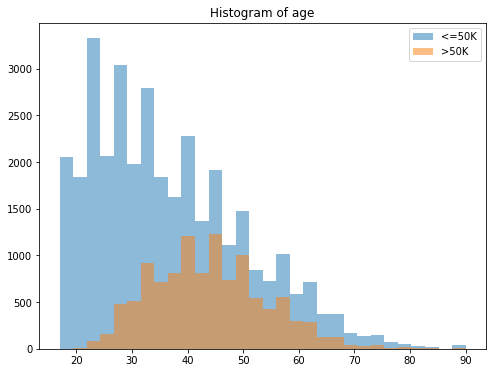

In [38]:
# 以收入50K为界限，绘制年龄的分布直方图
fig = plt.figure(figsize=(8, 6))
ax1 = fig.add_subplot(111)
ax1.hist(data[data['income']=='<=50K'].age, bins=30, range=(17, 90), label='<=50K', alpha=0.5)
ax1.set_title('Histogram of age')
ax1.hist(data[data['income']=='>50K'].age, bins=30, range=(17, 90), label='>50K', alpha=0.5)
plt.legend()
plt.show()

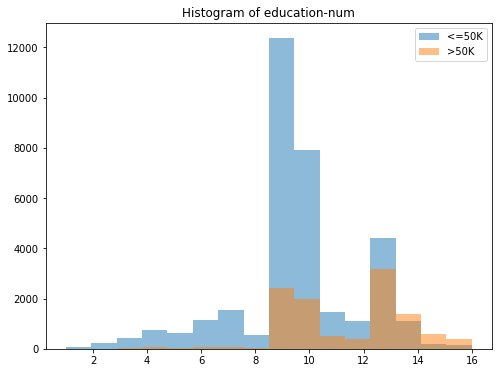

In [39]:
# 以收入50K为界限，绘制教育年限的分布直方图
fig = plt.figure(figsize=(8, 6))
ax1 = fig.add_subplot(111)
ax1.hist(data[data['income']=='<=50K']['education-num'], bins=16, range=(1, 16), label='<=50K', alpha=0.5)
ax1.set_title('Histogram of education-num')
ax1.hist(data[data['income']=='>50K']['education-num'], bins=16, range=(1, 16), label='>50K', alpha=0.5)
plt.legend()
plt.show()

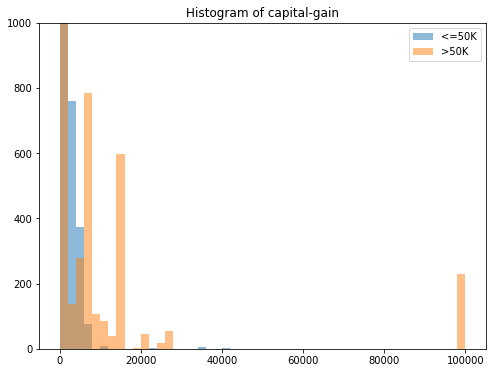

In [40]:
# 以收入50K为界限，绘制资产收益的分布直方图
fig = plt.figure(figsize=(8, 6))
ax1 = fig.add_subplot(111)
ax1.hist(data[data['income']=='<=50K']['capital-gain'], bins=50, range=(0, 100000), label='<=50K', alpha=0.5)
ax1.set_title('Histogram of capital-gain')
ax1.hist(data[data['income']=='>50K']['capital-gain'], bins=50, range=(0, 100000), label='>50K', alpha=0.5)
ax1.set_ylim(0, 1000)
plt.legend()
plt.show()

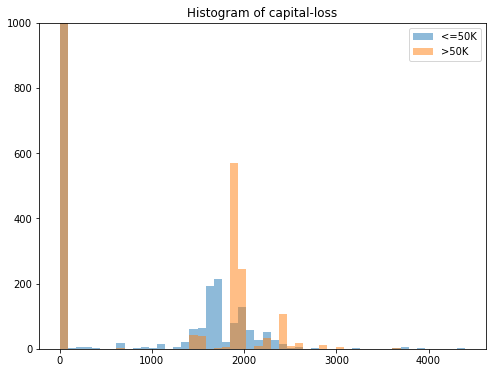

In [41]:
# 以收入50K为界限，绘制资产损失的分布直方图
fig = plt.figure(figsize=(8, 6))
ax1 = fig.add_subplot(111)
ax1.hist(data[data['income']=='<=50K']['capital-loss'], bins=50, range=(0, 4400), label='<=50K', alpha=0.5)
ax1.set_title('Histogram of capital-loss')
ax1.hist(data[data['income']=='>50K']['capital-loss'], bins=50, range=(0, 4400), label='>50K', alpha=0.5)
ax1.set_ylim(0, 1000)
plt.legend()
plt.show()

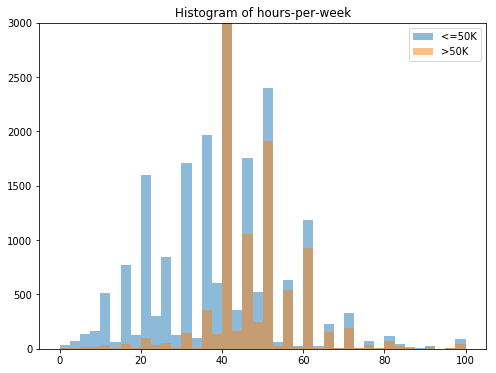

In [42]:
# 以收入50K为界限，绘制资产损失的分布直方图
fig = plt.figure(figsize=(8, 6))
ax1 = fig.add_subplot(111)
ax1.hist(data[data['income']=='<=50K']['hours-per-week'], bins=40, range=(0, 100), label='<=50K', alpha=0.5)
ax1.set_title('Histogram of hours-per-week')
ax1.hist(data[data['income']=='>50K']['hours-per-week'], bins=40, range=(0, 100), label='>50K', alpha=0.5)
ax1.set_ylim(0, 3000)
plt.legend()
plt.show()

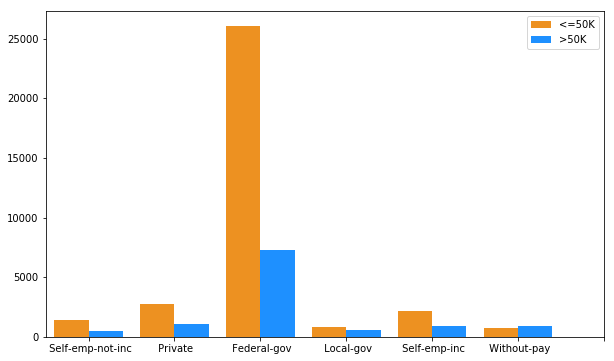

In [43]:
# 以收入50K为界限，绘制workclass的柱状图
fig = plt.figure(figsize=(10, 6))
ax1 = fig.add_subplot(111)
bar_width = 0.4
item_list = list(data['workclass'].unique())
for index, item in enumerate(item_list):
    p1 = ax1.bar(index-0.5*bar_width, data[data['income']=='<=50K']['workclass'].value_counts()[item], 
            width=bar_width, color='#ED9121')
    p2 = ax1.bar(index+0.5*bar_width, data[data['income']=='>50K']['workclass'].value_counts()[item], 
            width=bar_width, color='#1E90FF')
ax1.set_xticklabels(item_list)
ax1.set_xlim((-0.5, len(item_list)-1))
plt.legend([p1, p2], ['<=50K', '>50K'], loc='upper right', scatterpoints=1)
plt.show()

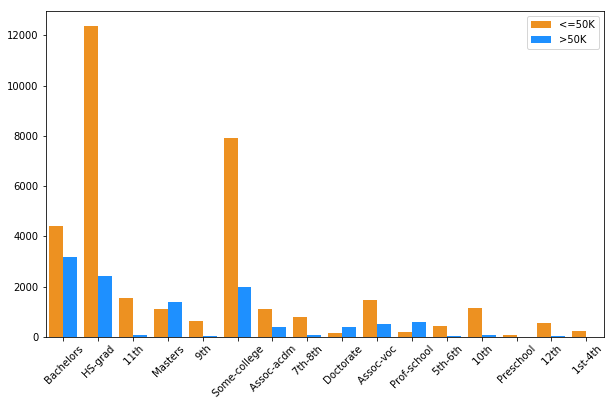

In [44]:
# 以收入50K为界限，绘制'education_level'的柱状图
fig = plt.figure(figsize=(10, 6))
ax1 = fig.add_subplot(111)
bar_width = 0.4
item_list = list(data['education_level'].unique())
for index, item in enumerate(item_list):
    p1 = ax1.bar(index-0.5*bar_width, data[data['income']=='<=50K']['education_level'].value_counts()[item], 
            width=bar_width, color='#ED9121')
    p2 = ax1.bar(index+0.5*bar_width, data[data['income']=='>50K']['education_level'].value_counts()[item], 
            width=bar_width, color='#1E90FF')
ax1.set_xticks(range(0, len(item_list)))
ax1.set_xticklabels(item_list, rotation=45)
ax1.set_xlim((-0.5, len(item_list)-0.5))
plt.legend([p1, p2], ['<=50K', '>50K'], loc='upper right', scatterpoints=1)
plt.show()

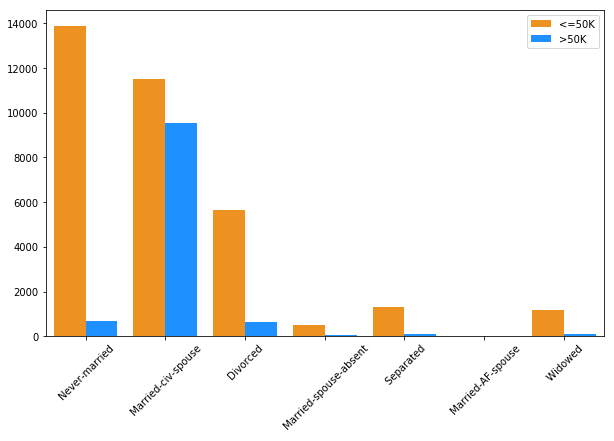

In [45]:
# 以收入50K为界限，绘制'marital-status'的柱状图
fig = plt.figure(figsize=(10, 6))
ax1 = fig.add_subplot(111)
bar_width = 0.4
item_list = list(data['marital-status'].unique())
for index, item in enumerate(item_list):
    p1 = ax1.bar(index-0.5*bar_width, data[data['income']=='<=50K']['marital-status'].value_counts()[item], 
            width=bar_width, color='#ED9121')
    p2 = ax1.bar(index+0.5*bar_width, data[data['income']=='>50K']['marital-status'].value_counts()[item], 
            width=bar_width, color='#1E90FF')
ax1.set_xticks(range(0, len(item_list)))
ax1.set_xticklabels(item_list, rotation=45)
ax1.set_xlim((-0.5, len(item_list)-0.5))
plt.legend([p1, p2], ['<=50K', '>50K'], loc='upper right', scatterpoints=1)
plt.show()

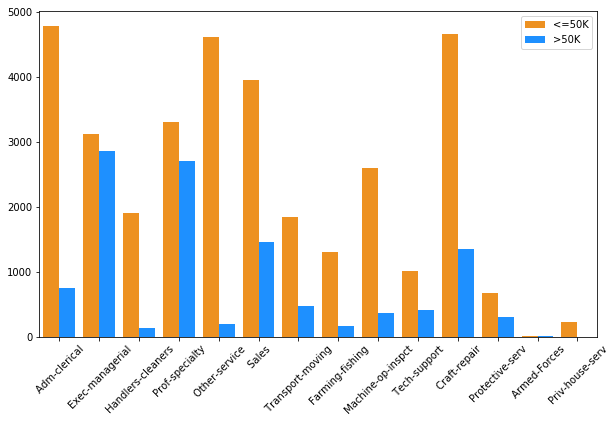

In [46]:
# 以收入50K为界限，绘制'occupation'的柱状图
fig = plt.figure(figsize=(10, 6))
ax1 = fig.add_subplot(111)
bar_width = 0.4
item_list = list(data['occupation'].unique())
for index, item in enumerate(item_list):
    p1 = ax1.bar(index-0.5*bar_width, data[data['income']=='<=50K']['occupation'].value_counts()[item], 
            width=bar_width, color='#ED9121')
    p2 = ax1.bar(index+0.5*bar_width, data[data['income']=='>50K']['occupation'].value_counts()[item], 
            width=bar_width, color='#1E90FF')
ax1.set_xticks(range(0, len(item_list)))
ax1.set_xticklabels(item_list, rotation=45)
ax1.set_xlim((-0.5, len(item_list)-0.5))
plt.legend([p1, p2], ['<=50K', '>50K'], loc='upper right', scatterpoints=1)
plt.show()

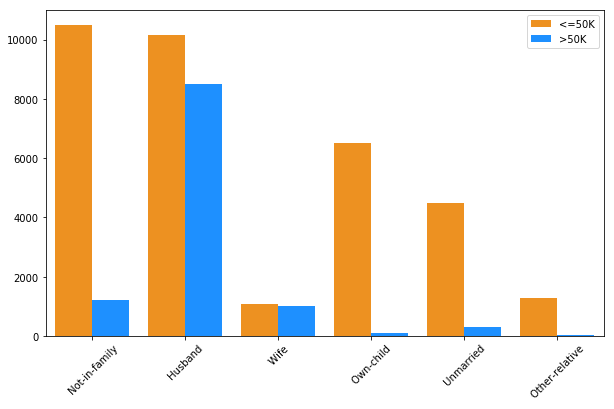

In [47]:
# 以收入50K为界限，绘制'relationship'的柱状图
fig = plt.figure(figsize=(10, 6))
ax1 = fig.add_subplot(111)
bar_width = 0.4
item_list = list(data['relationship'].unique())
for index, item in enumerate(item_list):
    p1 = ax1.bar(index-0.5*bar_width, data[data['income']=='<=50K']['relationship'].value_counts()[item], 
            width=bar_width, color='#ED9121')
    p2 = ax1.bar(index+0.5*bar_width, data[data['income']=='>50K']['relationship'].value_counts()[item], 
            width=bar_width, color='#1E90FF')
ax1.set_xticks(range(0, len(item_list)))
ax1.set_xticklabels(item_list, rotation=45)
ax1.set_xlim((-0.5, len(item_list)-0.5))
plt.legend([p1, p2], ['<=50K', '>50K'], loc='upper right', scatterpoints=1)
plt.show()

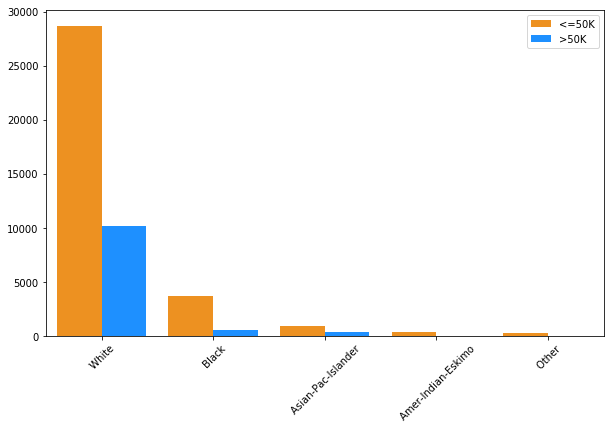

In [48]:
# 以收入50K为界限，绘制'race'的柱状图
fig = plt.figure(figsize=(10, 6))
ax1 = fig.add_subplot(111)
bar_width = 0.4
item_list = list(data['race'].unique())
for index, item in enumerate(item_list):
    p1 = ax1.bar(index-0.5*bar_width, data[data['income']=='<=50K']['race'].value_counts()[item], 
            width=bar_width, color='#ED9121')
    p2 = ax1.bar(index+0.5*bar_width, data[data['income']=='>50K']['race'].value_counts()[item], 
            width=bar_width, color='#1E90FF')
ax1.set_xticks(range(0, len(item_list)))
ax1.set_xticklabels(item_list, rotation=45)
ax1.set_xlim((-0.5, len(item_list)-0.5))
plt.legend([p1, p2], ['<=50K', '>50K'], loc='upper right', scatterpoints=1)
plt.show()

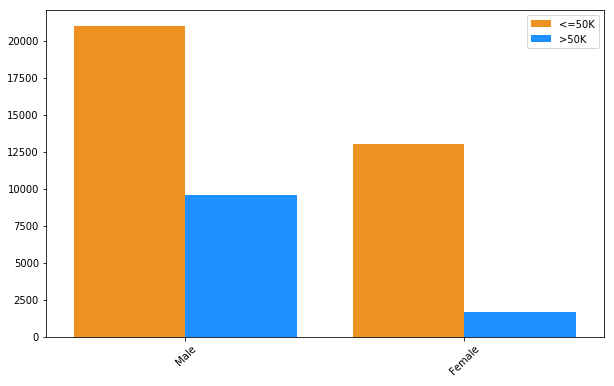

In [49]:
# 以收入50K为界限，绘制'sex'的柱状图
fig = plt.figure(figsize=(10, 6))
ax1 = fig.add_subplot(111)
bar_width = 0.4
item_list = list(data['sex'].unique())
for index, item in enumerate(item_list):
    p1 = ax1.bar(index-0.5*bar_width, data[data['income']=='<=50K']['sex'].value_counts()[item], 
            width=bar_width, color='#ED9121')
    p2 = ax1.bar(index+0.5*bar_width, data[data['income']=='>50K']['sex'].value_counts()[item], 
            width=bar_width, color='#1E90FF')
ax1.set_xticks(range(0, len(item_list)))
ax1.set_xticklabels(item_list, rotation=45)
ax1.set_xlim((-0.5, len(item_list)-0.5))
plt.legend([p1, p2], ['<=50K', '>50K'], loc='upper right', scatterpoints=1)
plt.show()

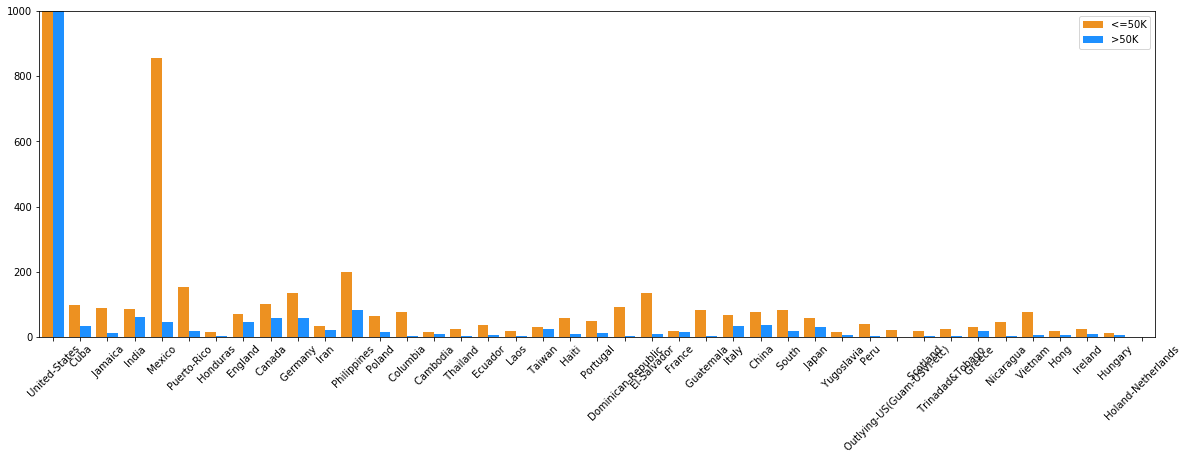

In [50]:
# 以收入50K为界限，绘制'native-country'的柱状图
fig = plt.figure(figsize=(20, 6))
ax1 = fig.add_subplot(111)
bar_width = 0.4
item_list = list(data['native-country'].unique())
for index, item in enumerate(item_list):
    p1 = ax1.bar(index-0.5*bar_width, data[data['income']=='<=50K']['native-country'].value_counts()[item], 
            width=bar_width, color='#ED9121')
    if item in data[data['income']=='>50K']['native-country'].value_counts().keys():
        p2 = ax1.bar(index+0.5*bar_width, data[data['income']=='>50K']['native-country'].value_counts()[item], 
                width=bar_width, color='#1E90FF')
ax1.set_xticks(range(0, len(item_list)))
ax1.set_xticklabels(item_list, rotation=45)
ax1.set_xlim((-0.5, len(item_list)-0.5))
ax1.set_ylim(0, 1000)
plt.legend([p1, p2], ['<=50K', '>50K'], loc='upper right', scatterpoints=1)
plt.show()

**回答：**
根据以上数值型特征的分布直方图和类别型特征的柱状图分析和对比，我倾向于以下5个特征对收入是否达到50K影响最大：
- 特征1: capital_gain, 从分布直方图来看，收入<50K的人群的capital-gain几乎都集中在0附近，而capital-gain收入大于0的数量很多且几乎都是收入>50K的。从图像上看可以根据capital-gain是否>1000而直接区分出收入>=50K的人。
- 特征4: age，从分布直方图来看，收入>50K的人群的平均年龄整体比较偏大，毕竟很少有年轻人刚开始工作就有很高的收入。
- 特征2: education_num，从分布直方图来看，收入>50K的人群的education-num几乎都在9以上，根据生活经验也可以得出类似结论，受教育时间越长，收入大概率会更高。
- 特征3: marital-status，从柱状图看，处于已婚状态比单身和离婚状态的人有更大概率收入>50K，毕竟两个人互相扶持，应该可以带来更好的收入。
- 特征5: sex，从柱状图看，男性收入>50K的概率接近1/3，而女性收入>50K的概率接近1/8。

### 练习 - 提取特征重要性

选择一个`scikit-learn`中有`feature_importance_`属性的监督学习分类器，这个属性是一个在做预测的时候根据所选择的算法来对特征重要性进行排序的功能。

在下面的代码单元中，你将要实现以下功能：
 - 如果这个模型和你前面使用的三个模型不一样的话从sklearn中导入一个监督学习模型。
 - 在整个训练集上训练一个监督学习模型。
 - 使用模型中的 `'feature_importances_'`提取特征的重要性。

#### 使用AdaBoost提取特征重要性

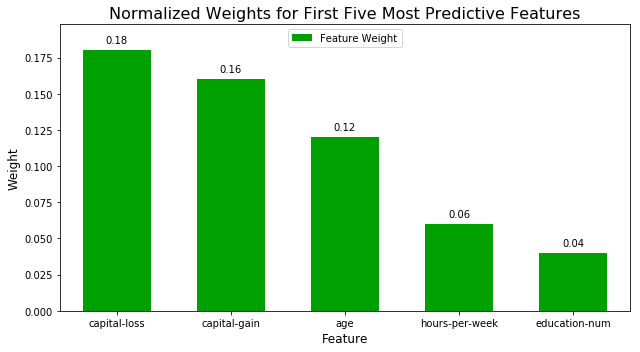

In [51]:
# TODO：导入一个有'feature_importances_'的监督学习模型
from sklearn.ensemble import AdaBoostClassifier

# TODO：在训练集上训练一个监督学习模型
model = AdaBoostClassifier()
model.fit(X_train, y_train)

# TODO： 提取特征重要性
importances = model.feature_importances_

# 绘图
vs.feature_plot(importances, X_train, y_train)

In [52]:
model.base_estimator_

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=1,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [53]:
model.n_estimators

50

### 问题 7 - 提取特征重要性
观察上面创建的展示五个用于预测被调查者年收入是否大于\$50,000最相关的特征的可视化图像。

_这五个特征的权重加起来是否超过了0.5?_<br>
_这五个特征和你在**问题 6**中讨论的特征比较怎么样？_<br>
_如果说你的答案和这里的相近，那么这个可视化怎样佐证了你的想法？_<br>
_如果你的选择不相近，那么为什么你觉得这些特征更加相关？_

**回答：**

_**问题1**：这五个特征的权重加起来是否超过了0.5?_<br>

0.18+0.16+0.12+0.06+0.04 = 0.56，这五个特征的权重加起来已经超过了0.5.

_**问题2**：这五个特征和你在**问题 6**中讨论的特征比较怎么样？_<br>

- 这五个特征和我在**问题 6**中选择的特征，重叠的有capital-gain、age、education-num这三个特征，但是重要性排序有一些差别。
- AdaBoost模型把capital-loss的权重排在了第一位，但是从我之前的特征可视化分析来看，把capital-loss作为分类的最重要的特征，感觉不太符合预期啊，毕竟capital-loss>0的人也才占比5%左右，而且这5%的人群里>50K收入和<=50收入的分布差别并不是特别大。
- AdaBoost模型把hours-per-week这个特征选了尽量，并排在了第4位。在我选择特征的适合，也考虑过这个特征，因为从分布直方图来看，确实收入>50K的人群的工作时间确实更多的分布在>40小时区间。

_**问题3**：如果说你的答案和这里的相近，那么这个可视化怎样佐证了你的想法？_<br>

算比较相近吧，佐证了我的部分想法，capital-gain、age和education-num的重要性比较符合我答案里的预期，hours-per-week这个特征也算是在我考虑的特征中，但是对于模型选择capital-loss特征作为最重要的特征，不是特别理解。

_**问题4**：如果你的选择不相近，那么为什么你觉得这些特征更加相关？_<br>

- 模型的特征权重排序和我的选择的重要特征的区别主要在于capital-loss这个特征。
- 因为从capital-loss的分布直方图来看，>50K和<=50K的人很相似。因为超过90%的人capital-loss都是0，而在capital-loss>0的人群里，>50K和<=50K的分布直方图差别并不明显。
- 差别的原因可能在于可能和AdaBoost算法不是简单的决策树算法有关系，如果是决策树算法（如下图）其选择的特征的重要性与我的分析更加接近，差别只在于hours-per-week。
- 至于AdaBoost为什么会把capital-loss这个特征的权重放在如此重要的位置，我觉得差别可能是由于AdaBoost算法的基学习器为深度为1的决策树的组合，而且训练时决策树为递进关系。

In [54]:
print('Percentage of capital-loss > 0 in income > 50K: {:.4f}'.format(
    sum(data[data['income']=='>50K']['capital-loss']!=0)/len(data[data['income']=='>50K']['capital-loss'])))
print('Percentage of capital-loss > 0 in income > 50K: {:.4f}'.format(
    sum(data[data['income']=='<=50K']['capital-loss']!=0)/len(data[data['income']=='<=50K']['capital-loss'])))

Percentage of capital-loss > 0 in income > 50K: 0.0980
Percentage of capital-loss > 0 in income > 50K: 0.0306


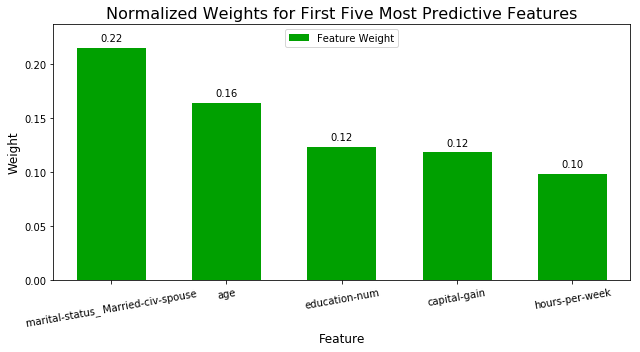

In [55]:
# 通过决策树模型进行特征重要性排序
from sklearn.tree import DecisionTreeClassifier
model_tree = DecisionTreeClassifier()
model_tree.fit(X_train, y_train)
importances_tree = model_tree.feature_importances_
vs.feature_plot(importances_tree, X_train, y_train)

### 特征选择

如果我们只是用可用特征的一个子集的话模型表现会怎么样？通过使用更少的特征来训练，在评价指标的角度来看我们的期望是训练和预测的时间会更少。从上面的可视化来看，我们可以看到前五个最重要的特征贡献了数据中**所有**特征中超过一半的重要性。这提示我们可以尝试去**减小特征空间**，简化模型需要学习的信息。下面代码单元将使用你前面发现的优化模型，并**只使用五个最重要的特征**在相同的训练集上训练模型。

In [56]:
# 导入克隆模型的功能
from sklearn.base import clone

# 减小特征空间
X_train_reduced = X_train[X_train.columns.values[(np.argsort(importances)[::-1])[:5]]]
X_val_reduced = X_val[X_val.columns.values[(np.argsort(importances)[::-1])[:5]]]

# 在前面的网格搜索的基础上训练一个“最好的”模型
clf_on_reduced = (clone(best_clf)).fit(X_train_reduced, y_train)

# 做一个新的预测
reduced_predictions = clf_on_reduced.predict(X_val_reduced)

# 对于每一个版本的数据汇报最终模型的分数
print ("Final Model trained on full data\n------")
print ("Accuracy on validation data: {:.4f}".format(accuracy_score(y_val, best_predictions)))
print ("F-score on validation data: {:.4f}".format(fbeta_score(y_val, best_predictions, beta = 0.5)))
print ("\nFinal Model trained on reduced data\n------")
print ("Accuracy on validation data: {:.4f}".format(accuracy_score(y_val, reduced_predictions)))
print ("F-score on validation data: {:.4f}".format(fbeta_score(y_val, reduced_predictions, beta = 0.5)))

Final Model trained on full data
------
Accuracy on validation data: 0.8758
F-score on validation data: 0.7636

Final Model trained on reduced data
------
Accuracy on validation data: 0.8478
F-score on validation data: 0.7253


In [57]:
# 对比两种模型在分数上的差距百分比
acc_best = accuracy_score(y_val, best_predictions)
fbeta_best = fbeta_score(y_val, best_predictions, beta = 0.5)
acc_reduced = accuracy_score(y_val, reduced_predictions)
fbeta_reduced = fbeta_score(y_val, reduced_predictions, beta = 0.5)
print('Precentage of difference of accuracy on validation data: {:.4f}%'.format((acc_best-acc_reduced)/acc_best * 100))
print('Precentage of difference of accuracy on validation data: {:.4f}%'.format((fbeta_best-fbeta_reduced)/fbeta_best * 100))

Precentage of difference of accuracy on validation data: 3.1876%
Precentage of difference of accuracy on validation data: 5.0086%


### 问题 8 - 特征选择的影响

*最终模型在只是用五个特征的数据上和使用所有的特征数据上的 F-score 和准确率相比怎么样？*  
*如果训练时间是一个要考虑的因素，你会考虑使用部分特征的数据作为你的训练集吗？*

**回答：**

- 相比使用所以特征数据进行训练得到的模型，只使用五个特征的数据进行训练得到的模型在准确率和F-score上均更低，但是差别并不大在6%以内。
- 如果训练时间是一个要考虑的因素，我会考虑使用部分特征的数据作为模型的训练集。

### 问题 9 - 在测试集上测试你的模型

终于到了测试的时候，记住，测试集只能用一次。

*使用你最有信心的模型，在测试集上测试，计算出准确率和 F-score。*
*简述你选择这个模型的原因，并分析测试结果*

In [58]:
#TODO test your model on testing data and report accuracy and F score
y_pred = best_clf.predict(X_test)
acc_test = accuracy_score(y_test, y_pred)
fbeta_test = fbeta_score(y_test, y_pred, beta=0.5)
print("Accuracy on test data: {:.4f}".format(acc_test))
print("Fbeta-score on test data: {:.4f}".format(fbeta_test))

Accuracy on test data: 0.8702
Fbeta-score on test data: 0.7568


AdaBoost算法相对决策树算法不容易发生过拟合，泛化性能更好，而与AdaBoost算法性能差不多的支持向量机算法，但其训练时间和预测时间比AdaBoost算法高出一个数量级，因此这里我选择了AdaBoost作为参数调优的模型，并选择调优后的模型作为最终的模型。

> **注意：** 当你写完了所有的代码，并且回答了所有的问题。你就可以把你的 iPython Notebook 导出成 HTML 文件。你可以在菜单栏，这样导出**File -> Download as -> HTML (.html)**把这个 HTML 和这个 iPython notebook 一起做为你的作业提交。